# Linear Regresion

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


<Axes: xlabel='sex', ylabel='Count'>

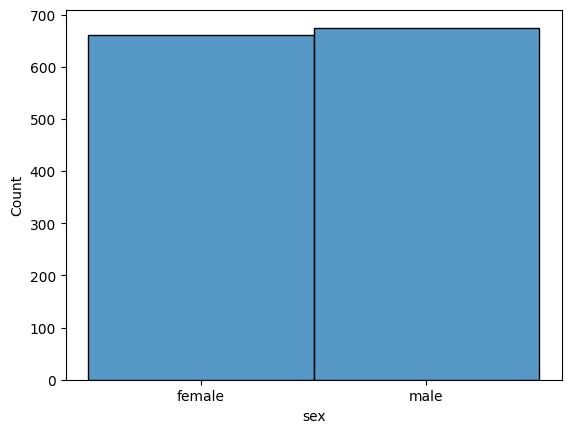

In [7]:
import seaborn as sns

sns.histplot(data = df, x='sex')

<Axes: xlabel='smoker', ylabel='Count'>

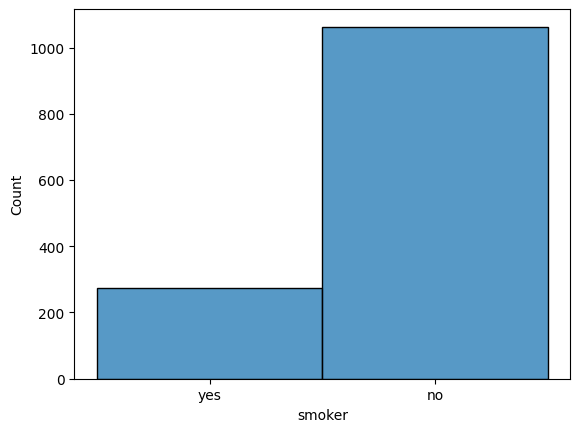

In [8]:
sns.histplot(data = df, x='smoker')

<Axes: xlabel='region', ylabel='Count'>

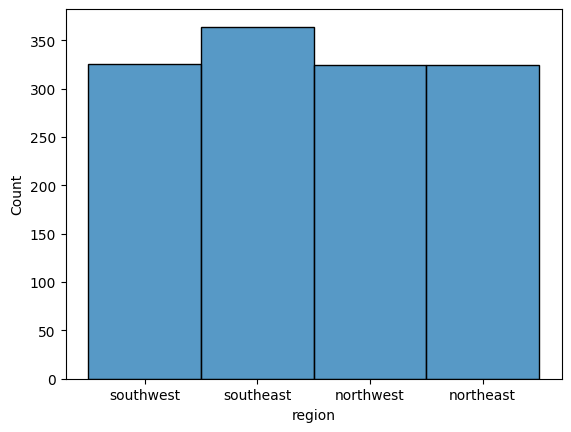

In [9]:
sns.histplot(data = df, x='region')

<Axes: xlabel='age'>

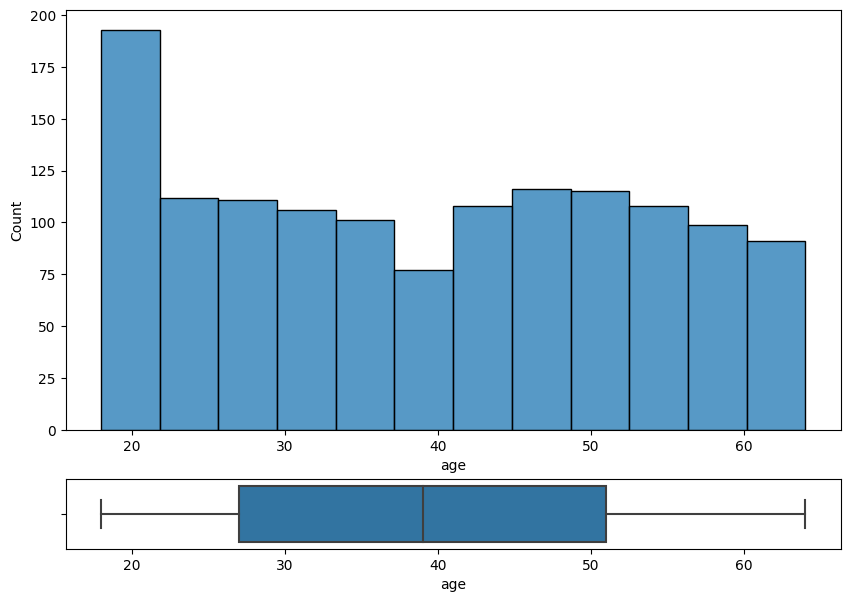

In [10]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(2,1,figsize=(10,7), gridspec_kw={'height_ratios':[6,1]})
sns.histplot(ax = axis[0], data = df, x='age')
sns.boxplot(ax=axis[1],data = df, x='age')

<Axes: xlabel='children'>

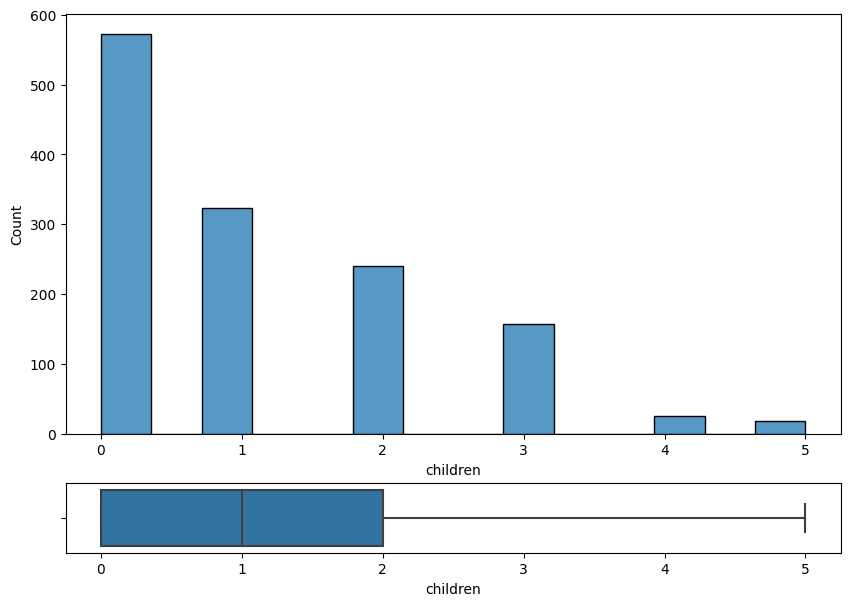

In [11]:
fig,axis = plt.subplots(2,1,figsize=(10,7), gridspec_kw={'height_ratios':[6,1]})
sns.histplot(ax = axis[0], data = df, x='children')
sns.boxplot(ax=axis[1],data = df, x='children')

<Axes: xlabel='bmi'>

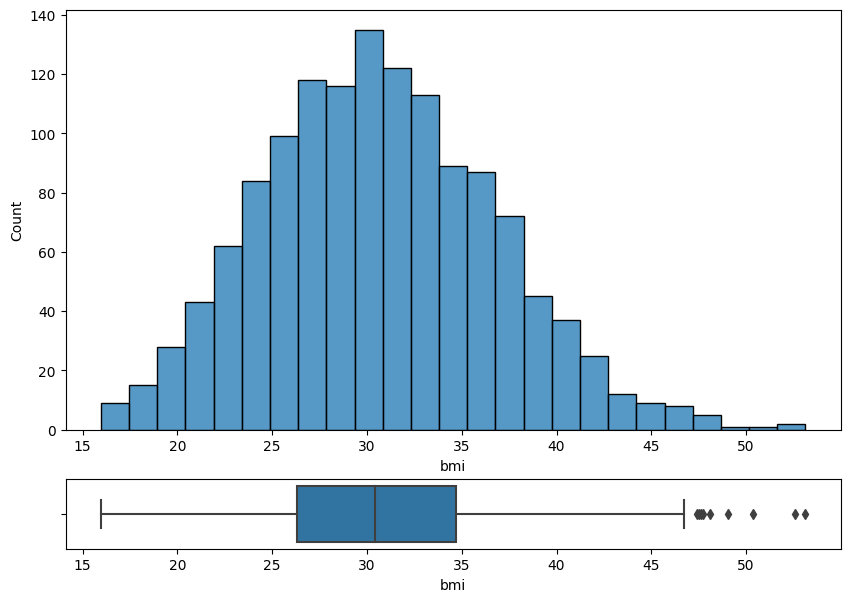

In [12]:
fig,axis = plt.subplots(2,1,figsize=(10,7), gridspec_kw={'height_ratios':[6,1]})
sns.histplot(ax = axis[0], data = df, x='bmi')
sns.boxplot(ax=axis[1],data = df, x='bmi')

<Axes: xlabel='children', ylabel='charges'>

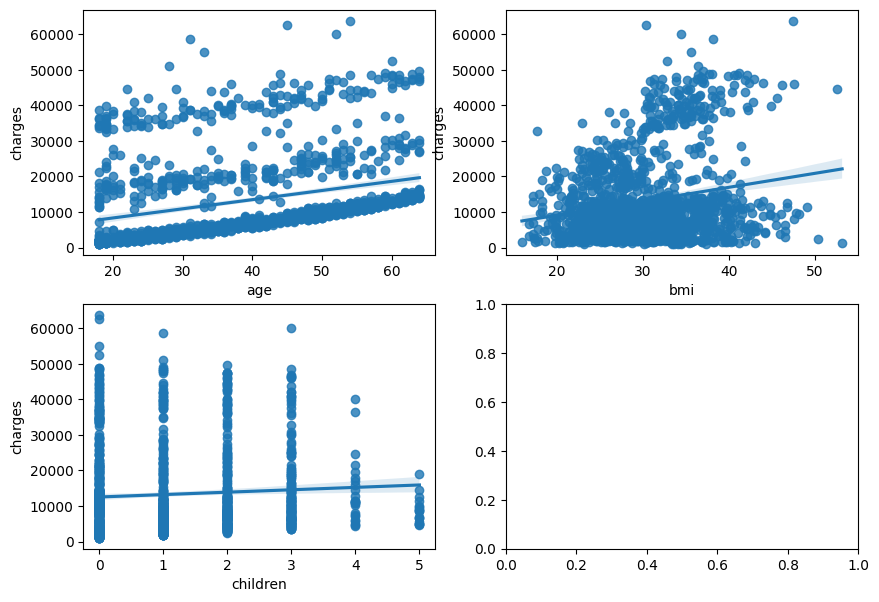

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.regplot(ax = axis[1, 0], data = df, x = "children", y = "charges")

<Axes: >

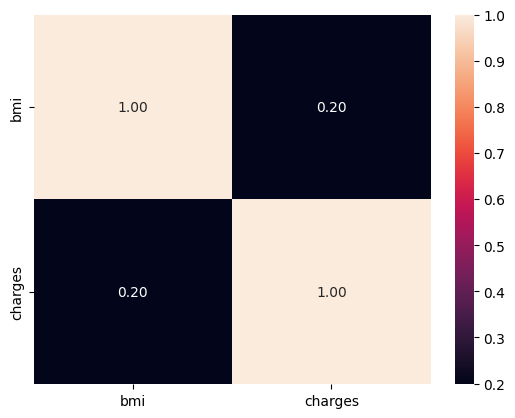

In [14]:
sns.heatmap(df[['bmi', 'charges']].corr(),annot = True, fmt='.2f')

<Axes: >

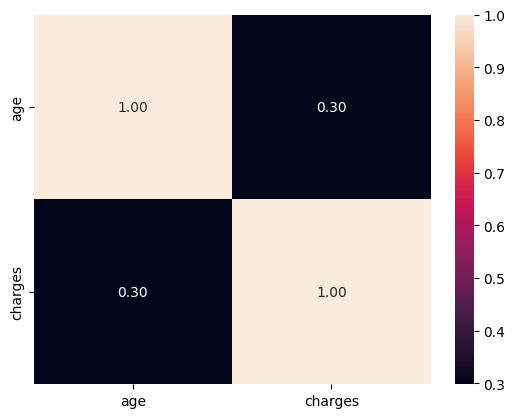

In [15]:
sns.heatmap(df[['age', 'charges']].corr(),annot = True, fmt='.2f')

<Axes: >

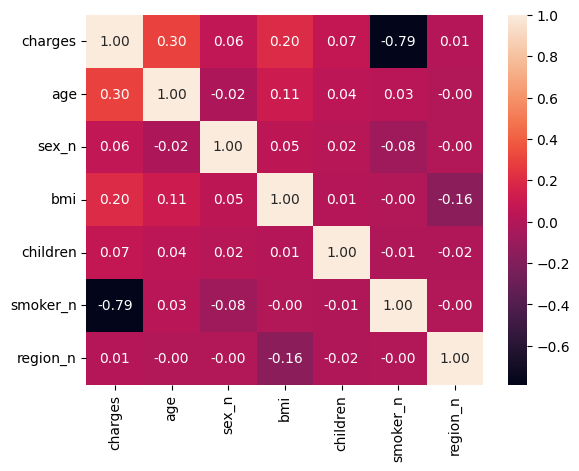

In [19]:
sns.heatmap(df[["charges",'age','sex_n','bmi','children','smoker_n','region_n']].corr(),annot=True,fmt=".2f")

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


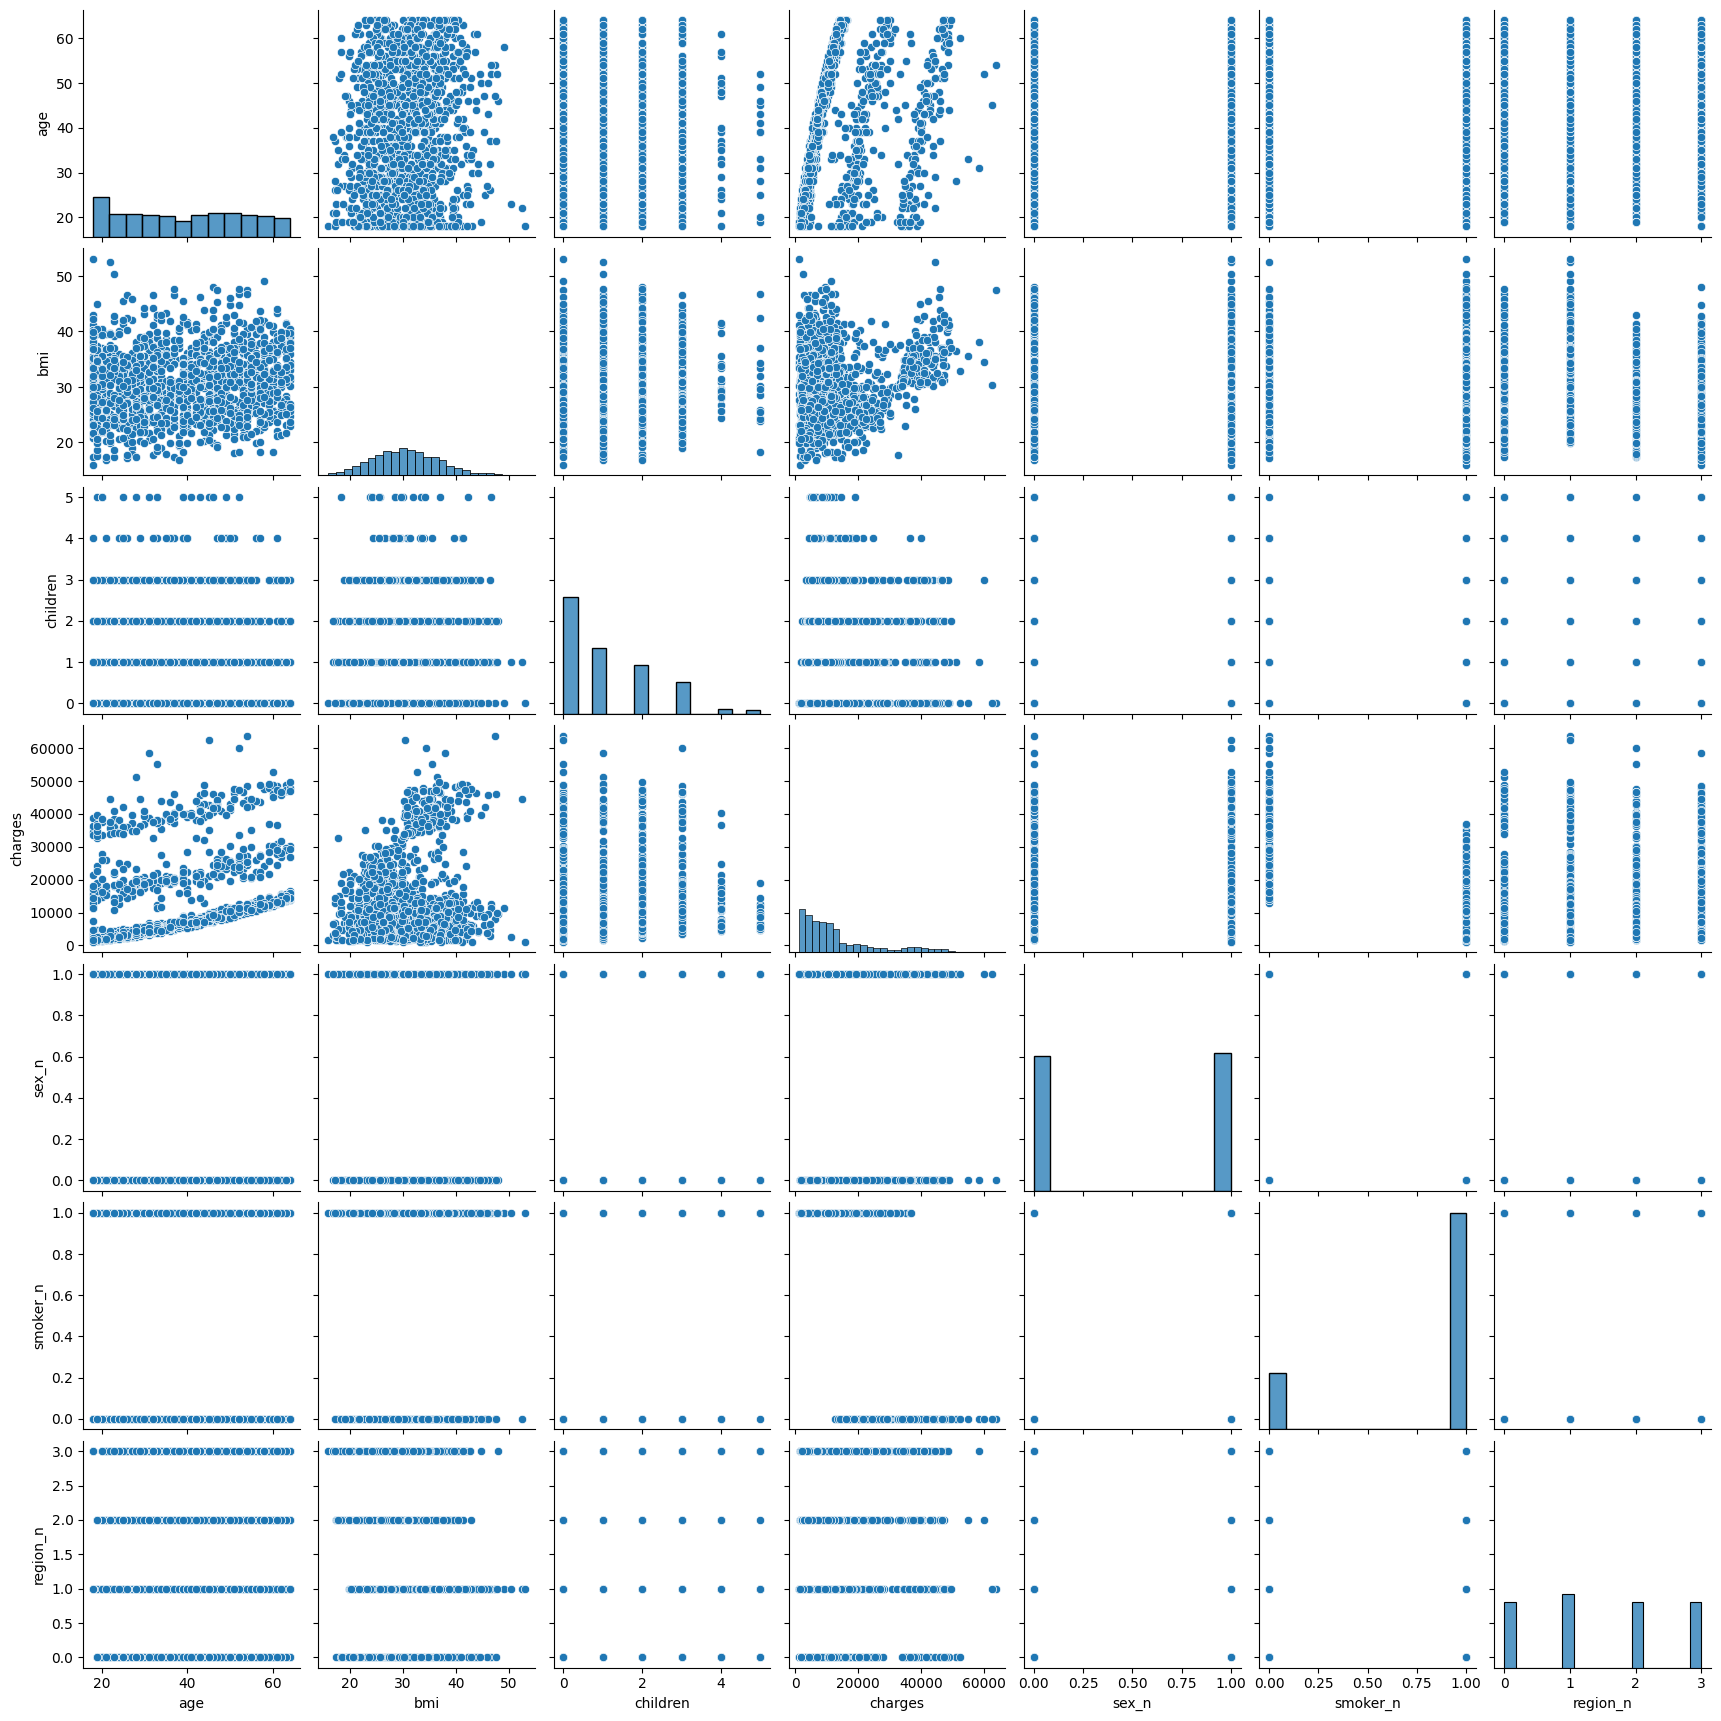

In [20]:
sns.pairplot(data=df)

In [21]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12,0.50,0.80,1.48
std,14.04,6.10,1.21,12110.36,0.50,0.40,1.11
min,18.00,15.96,0.00,1121.87,0.00,0.00,0.00
25%,27.00,26.29,0.00,4746.34,0.00,1.00,1.00
50%,39.00,30.40,1.00,9386.16,1.00,1.00,1.00
75%,51.00,34.70,2.00,16657.72,1.00,1.00,2.00
max,64.00,53.13,5.00,63770.43,1.00,1.00,3.00


In [22]:
stats = df['bmi'].describe()
bmi_iqr = stats['75%'] - stats['25%']
limite_superior = stats['75%'] + 1.5 * bmi_iqr
limite_inferior = stats['25%'] - 1.5 * bmi_iqr
print("El limite superior es: ", limite_superior)
print("El limite inferior es: ", limite_inferior)

El limite superior es:  47.31500000000001
El limite inferior es:  13.674999999999994


In [23]:
df[df['bmi'] > limite_superior]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
116,58,male,49.06,0,no,southeast,11381.32540,1,1,1
286,46,female,48.07,2,no,northeast,9432.92530,0,1,3
401,47,male,47.52,1,no,southeast,8083.91980,1,1,1
543,54,female,47.41,0,yes,southeast,63770.42801,0,0,1
846,23,male,50.38,1,no,southeast,2438.05520,1,1,1
859,37,female,47.60,2,yes,southwest,46113.51100,0,0,0
1046,22,male,52.58,1,yes,southeast,44501.39820,1,0,1
1087,52,male,47.74,1,no,southeast,9748.91060,1,1,1
1316,18,male,53.13,0,no,southeast,1163.46270,1,1,1


In [24]:
from math import sqrt
df['bmi_sq'] = df['bmi'].apply(sqrt)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
variables_normalizadas = scaler.fit_transform(df[['bmi','age','children','bmi_sq','sex_n','smoker_n','region_n']])
df_normalizado = pd.DataFrame(variables_normalizadas,index=df.index, columns=['bmi','age','children','bmi_sq','sex_n','smoker_n','region_n'])
df_normalizado['charges'] = df['charges']
df_normalizado.head()

,bmi,age,children,bmi_sq,sex_n,smoker_n,region_n,charges
0,-0.453160,-1.440418,-0.909234,-0.412964,-1.009771,-1.969660,-1.343163,16884.92400
1,0.509422,-1.511647,-0.079442,0.546063,0.990324,0.507702,-0.438017,1725.55230
2,0.383155,-0.799350,1.580143,0.425297,0.990324,0.507702,-0.438017,4449.46200
3,-1.305052,-0.443201,-0.909234,-1.350093,0.990324,0.507702,0.467128,21984.47061
4,-0.292456,-0.514431,-0.909234,-0.246285,0.990324,0.507702,0.467128,3866.85520


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
variables_minmax = scaler2.fit_transform(df[['bmi','age','children','bmi_sq','sex_n','smoker_n','region_n']])
df_minmax = pd.DataFrame(variables_minmax,index=df.index, columns=['bmi','age','children','bmi_sq','sex_n','smoker_n','region_n'])
df_minmax['charges'] = df['charges']
df_minmax.head()

,bmi,age,children,bmi_sq,sex_n,smoker_n,region_n,charges
0,0.321227,0.021739,0.0,0.390721,0.0,0.0,0.000000,16884.92400
1,0.479150,0.000000,0.2,0.551360,1.0,1.0,0.333333,1725.55230
2,0.458434,0.217391,0.6,0.531131,1.0,1.0,0.333333,4449.46200
3,0.181464,0.326087,0.0,0.233750,1.0,1.0,0.666667,21984.47061
4,0.347592,0.304348,0.0,0.418640,1.0,1.0,0.666667,3866.85520


In [27]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split

X = df_normalizado.drop(columns=['charges'],axis=1)
y = df_normalizado['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

selector = SelectKBest(f_regression,k=5)
selector.fit(X_train,y_train)
ix = selector.get_support()
X_train_sel = pd.DataFrame(selector.transform(X_train),index=X_train.index,columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selector.transform(X_test),index=X_test.index,columns=X_test.columns[ix])

X_train_sel.head()

,bmi,age,children,bmi_sq,smoker_n
1113,-1.009063,-1.155499,-0.909234,-1.013386,0.507702
967,-0.806543,-1.297958,0.750351,-0.790108,0.507702
598,1.125178,0.910164,0.750351,1.116184,0.507702
170,1.772092,1.693691,-0.909234,1.685193,0.507702
275,-0.666338,0.554015,0.750351,-0.638654,0.507702


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel,y_train)

LinearRegression()

In [29]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 13184.958735189488
Coeficientes (b): [-4961.88653775  3454.73382504   650.23171311  6842.19549947
 -9307.52767202]


In [30]:
y_pred = model.predict(X_test_sel)


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"El MSE es: {mean_squared_error(y_test,y_pred)}")
print(f"El R2 es: {r2_score(y_test,y_pred)}")

El MSE es: 36430557.40768667
El R2 es: 0.8017450058163059


In [32]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print(f"El MSE es: {mean_squared_error(y_test,y_pred2)}")
print(f"El R2 es: {r2_score(y_test,y_pred2)}")

El MSE es: 35989014.39600943
El R2 es: 0.8041478816831861
